# **Домашнее задание №1**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
import plotly.express as px
import statsmodels.formula.api as smf

%config IPCompleter.greedy = True
%matplotlib inline

# Прогноз популярности песни

Пусть мы являемся продюссером некоторого исполнителя или автором песни. Мы хотим явить наше творение народу, будучи уверенными в том, что все наши старания не напрасны, что нам удастся стать популярными среди слушателей и заработать миллионы денег. Для этого мы собрали данные о песнях, находящихся в последнее время в топах популярных музыкальных платформ, чтобы проанализировать признаки, по которым песня, вероятнее всего, станет популярной.

Подгружаем файл с данными с GitHub:

In [ ]:
url = "https://raw.githubusercontent.com/nastyalabs/machlearn/main/song_data.csv"
data_raw = pd.read_csv(url)

Таблица содержит данные о почти 19 тысячах песен, выходящих в топы чартов по всему миру на протяжении последних нескольких лет. Для каждой песни указано название, популярность (в процентах), продолжительность (в мс), акустическая мощность и танцевальность, энергичность и инструментальность, живость и текстовая наполненность, аудиовалентность (в долях), громкость (в децибелах), темп (в такты/секунда) и музыкальный размер такта (одна, две, три, четыре четверти, пять шестых).

Вначале посмотрим на размеры таблицы - количество строк (каждая строка соответствует одной песне) и количество столбцов (каждый столбец соответствует конкретному признаку):

In [ ]:
data_raw.shape

(18835, 15)

In [ ]:
data_raw

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


In [ ]:
data_raw.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


Мы видим наличие следующих признаков:

- `song_name` - название песни
- `song_popularity` - популярность (место в топ-100)
- `song_duration_ms` - длительность (в мс)
- `acousticness` - акустичность (в долях)
- `danceability` - танцевальность (в долях)
- `energy` - энергичность (в долях)
- `instrumentalness` - инструментальность (в долях)
- `liveness` - живость (в долях)
- `loudness` - громкость (в дБ)
- `speechiness` - текстовая наполненность (в долях)
- `tempo` - темп (в тактах/секунда)
- `time_signature` - музыкальный размер такта (1/4 или 3/4 или 5/6 или 1/2)
- `audio_valence` - аудиовалентность (в долях)

Признак `song_name` - текстовый, все остальные признаки - числовые.

Требуется предсказать числовой признак `song_popularity` по остальным признакам. Это задача восстановления регрессии.

In [ ]:
data_raw.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


Давайте проверим, имеются ли пропущенные значения в нашем сете:

In [ ]:
data_raw.isna().sum()  

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

Пропущенных значений у нас нет, двигаемся дальше!

In [ ]:
data_raw['song_popularity'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     0.0
0.010     0.0
0.050     8.0
0.100    21.0
0.500    56.0
0.900    78.0
0.950    85.0
0.990    95.0
0.995    97.0
Name: song_popularity, dtype: float64

$99\%$ всех значений признака `'song_popularity'` находится в диапазоне от $0$ до $97$ места в чартах (это значения квантилей, соответствующих уровням $0.005$ и $0.995$ соответственно)

In [ ]:
data_raw['song_duration_ms'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     90231.26
0.010    104965.02
0.050    141586.00
0.100    159242.00
0.500    211306.00
0.900    282742.40
0.950    313786.00
0.990    414569.66
0.995    456612.80
Name: song_duration_ms, dtype: float64

$99\%$ всех значений `'song_duration_ms'` находится в диапазоне от $90$ до $457$ секунд

Удалим все строки таблицы, в которых `'song_popularity'` или `'song_duration_ms'` выходят за пределы квантилей $0.005$, $0.995$.

In [ ]:
rows_to_drop = data_raw[
    (data_raw['song_popularity'] < data_raw['song_popularity'].quantile(0.005)) | (data_raw['song_popularity'] > data_raw['song_popularity'].quantile(0.995)) | 
    (data_raw['song_duration_ms']  < data_raw['song_duration_ms' ].quantile(0.005)) | (data_raw['song_duration_ms']  > data_raw['song_duration_ms' ].quantile(0.995))].index
data = data_raw.drop(rows_to_drop)
data.shape

(18570, 15)

In [ ]:
data.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18570.000000,18570.000000,18570.000000,18570.000000,18570.000000,18570.000000,18570.000000,18570.000000,18570.000000,18570.000000,18570.000000,18570.000000,18570.000000,18570.000000
mean,52.883845,217208.882445,0.256779,0.633127,0.646207,0.074816,5.289930,0.179418,-7.413663,0.629079,0.101300,121.235443,3.959343,0.528578
std,21.787829,51372.781331,0.287454,0.156376,0.213407,0.216534,3.612729,0.143543,3.794489,0.483064,0.102733,28.703707,0.296850,0.244774
min,0.000000,90379.000000,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,184732.000000,0.024000,0.533000,0.511000,0.000000,2.000000,0.092800,-9.004750,0.000000,0.037700,98.881250,4.000000,0.336000
50%,56.000000,211226.000000,0.131000,0.644000,0.675000,0.000011,5.000000,0.122000,-6.534500,1.000000,0.055350,120.025500,4.000000,0.527000
75%,69.000000,242533.000000,0.420000,0.747000,0.816000,0.002320,8.000000,0.221000,-4.898000,1.000000,0.118000,139.949000,4.000000,0.726000
max,97.000000,456480.000000,0.996000,0.987000,0.999000,0.989000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


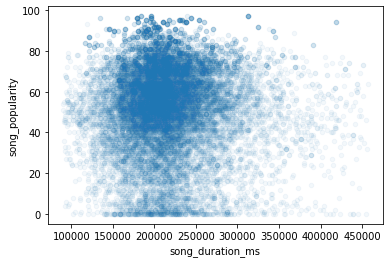

In [ ]:
data.plot(kind = 'scatter', x = 'song_duration_ms', y = 'song_popularity', alpha=.05)
pass

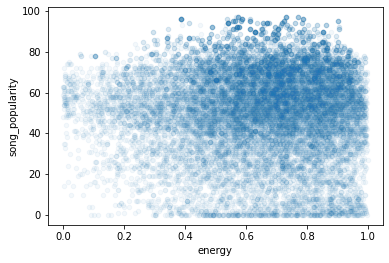

In [ ]:
data.plot(kind = 'scatter', x = 'energy', y = 'song_popularity', alpha=0.05)
pass

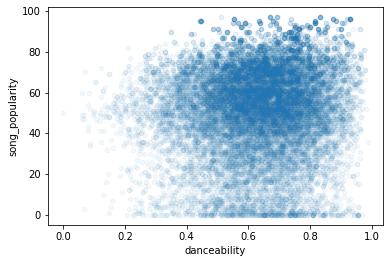

In [ ]:
data.plot(kind = 'scatter', x = 'danceability', y = 'song_popularity', alpha=0.05)
pass

Посчитаем матрицу корреляции:

In [ ]:
corr_mat = data.corr()
corr_mat

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
song_popularity,1.000000,-0.008092,-0.060889,0.098203,-0.001609,-0.128685,-0.012091,-0.038236,0.095955,-0.004994,0.019382,-0.019024,0.032509,-0.052770
song_duration_ms,-0.008092,1.000000,-0.101457,-0.100064,0.086717,-0.013481,-0.004367,0.002266,0.016522,-0.032544,-0.079871,0.005457,-0.012647,-0.071397
acousticness,-0.060889,-0.101457,1.000000,-0.180894,-0.662153,0.162387,-0.004224,-0.081784,-0.555354,0.068723,-0.106664,-0.133181,-0.156977,-0.122047
danceability,0.098203,-0.100064,-0.180894,1.000000,0.043781,-0.134105,0.010828,-0.090474,0.176123,-0.107872,0.211835,-0.122073,0.134064,0.333080
energy,-0.001609,0.086717,-0.662153,0.043781,1.000000,-0.194346,0.023059,0.167371,0.754481,-0.053421,0.071898,0.160703,0.148494,0.318018
instrumentalness,-0.128685,-0.013481,0.162387,-0.134105,-0.194346,1.000000,-0.013980,-0.030834,-0.380691,-0.011622,-0.085041,-0.034997,-0.068548,-0.182726
key,-0.012091,-0.004367,-0.004224,0.010828,0.023059,-0.013980,1.000000,-0.010525,0.013487,-0.172527,0.038524,0.002563,-0.007487,0.027182
liveness,-0.038236,0.002266,-0.081784,-0.090474,0.167371,-0.030834,-0.010525,1.000000,0.103998,-0.004582,0.093108,0.032127,0.014687,0.016972
loudness,0.095955,0.016522,-0.555354,0.176123,0.754481,-0.380691,0.013487,0.103998,1.000000,-0.061129,0.090452,0.130325,0.120502,0.198787
audio_mode,-0.004994,-0.032544,0.068723,-0.107872,-0.053421,-0.011622,-0.172527,-0.004582,-0.061129,1.000000,-0.112234,0.018057,-0.024803,-0.002729


Построим визуальный образ матрицы корреляции:

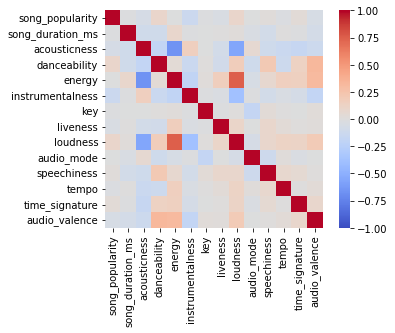

In [ ]:
sns.heatmap(corr_mat, square=True, vmin=-1, vmax=1, cmap='coolwarm')
pass

Здесь можем видеть корреляцию признаков `loudness` и `energy`, `danceability` и `audio_valence`. Я считаю, что это довольно близко с реальностью, так как для придачи музыке энергичности часто используют мощные громкие аккорды, которые быстро сменяют друг друга, а в пляс хочется броситься от тех песен, которые целиком захватывают все пространство дискозала. Признаки `acousticness` и `loudness` сильно коррелируют из-за того, что по своей сути относятся примерно к одной и той же оценке.

Выполним стандартизацию всех признаков:

In [ ]:
data_stand = (data - data.mean(axis = 0))/data.std(axis = 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:
data_stand.describe()

,acousticness,audio_mode,audio_valence,danceability,energy,instrumentalness,key,liveness,loudness,song_duration_ms,song_popularity,speechiness,tempo,time_signature
count,1.857000e+04,1.857000e+04,1.857000e+04,1.857000e+04,1.857000e+04,1.857000e+04,1.857000e+04,1.857000e+04,1.857000e+04,1.857000e+04,1.857000e+04,1.857000e+04,1.857000e+04,1.857000e+04
mean,-6.428173e-17,-5.050708e-17,2.846762e-16,-2.448828e-16,2.096809e-16,-3.137561e-17,-7.136038e-17,-8.188268e-17,2.479438e-16,-2.158030e-16,1.178498e-16,1.836621e-16,-3.076340e-16,6.875850e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-8.932837e-01,-1.302268e+00,-2.159448e+00,-4.048760e+00,-3.023038e+00,-3.455143e-01,-1.464248e+00,-1.173985e+00,-8.263126e+00,-2.468815e+00,-2.427220e+00,-9.860496e-01,-4.223686e+00,-1.333784e+01
25%,-8.097957e-01,-1.302268e+00,-7.867557e-01,-6.402997e-01,-6.335649e-01,-3.455143e-01,-9.106496e-01,-6.034249e-01,-4.193153e-01,-6.321807e-01,-5.913322e-01,-6.190800e-01,-7.787911e-01,1.369611e-01
50%,-4.375627e-01,7.678498e-01,-6.445418e-03,6.952976e-02,1.349200e-01,-3.454635e-01,-8.025236e-02,-4.000019e-01,2.316947e-01,-1.164602e-01,1.430227e-01,-4.472759e-01,-4.215283e-02,1.369611e-01
75%,5.678142e-01,7.678498e-01,8.065480e-01,7.282003e-01,7.956297e-01,-3.348000e-01,7.501449e-01,2.896858e-01,6.629781e-01,4.929482e-01,7.396861e-01,1.625555e-01,6.519561e-01,1.369611e-01
max,2.571610e+00,7.678498e-01,1.860580e+00,2.262967e+00,1.653146e+00,4.221889e+00,1.580542e+00,5.619090e+00,2.371509e+00,4.657546e+00,2.024807e+00,8.173590e+00,4.218360e+00,3.505661e+00


Подготовка данных к работе:

In [ ]:
clean_duplicated = data.duplicated(subset = None, keep = 'first')
n_duplicated = clean_duplicated[clean_duplicated == True].shape[0]
data = data.drop_duplicates(subset = None, keep = 'first')
data

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


In [ ]:
x = data['danceability'].values
y = data['song_popularity'].values 

In [ ]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)

Применим метод k ближайших соседей:

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, test_size=0.25)

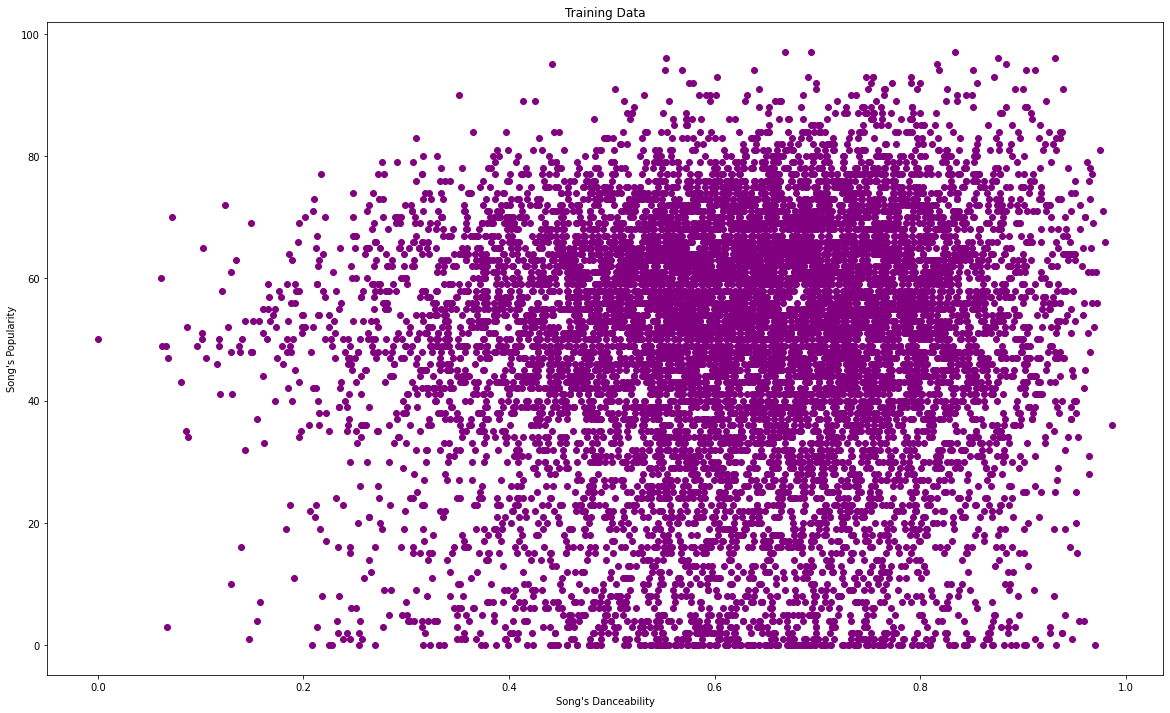

In [ ]:
plt.rcParams['figure.figsize'] = [20, 12]
plt.scatter(x_train, y_train, color='purple')
plt.xlabel('Song\'s Danceability')
plt.ylabel('Song\'s Popularity')
plt.title('Training Data')
plt.show()

In [ ]:
model = KNeighborsRegressor(n_neighbors=10)
model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [ ]:
y_train_predict = model.predict(x_train)
y_test_predict  = model.predict(x_test)
print(f'Train accuracy {round(model.score(x_train,y_train)*100, 2)}%')
print(f'Test accuracy {round(model.score(x_test,y_test)*100, 2)}%')

Train accuracy 0.46%
Test accuracy -9.64%


Изменим число соседей:

In [ ]:
model = KNeighborsRegressor(n_neighbors=3)
model.fit(x_train, y_train)
y_train_predict = model.predict(x_train)
y_test_predict  = model.predict(x_test)
print(f'Train accuracy {round(model.score(x_train,y_train)*100, 2)}%')
print(f'Test accuracy {round(model.score(x_test,y_test)*100, 2)}%')

Train accuracy -17.5%
Test accuracy -31.77%


In [ ]:
model = KNeighborsRegressor(n_neighbors=1)
model.fit(x_train, y_train)
y_train_predict = model.predict(x_train)
y_test_predict  = model.predict(x_test)
print(f'Train accuracy {round(model.score(x_train,y_train)*100, 2)}%')
print(f'Test accuracy {round(model.score(x_test,y_test)*100, 2)}%')

Train accuracy -76.23%
Test accuracy -92.39%


In [ ]:
model = KNeighborsRegressor(n_neighbors=2)
model.fit(x_train, y_train)
y_train_predict = model.predict(x_train)
y_test_predict  = model.predict(x_test)
print(f'Train accuracy {round(model.score(x_train,y_train)*100, 2)}%')
print(f'Test accuracy {round(model.score(x_test,y_test)*100, 2)}%')

Train accuracy -31.2%
Test accuracy -45.61%


Результаты мы получили данным методом обучения откровенно плохие. Попробуем применить линейную регрессию.

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

model.score(x_train, y_train)

0.0038360429819784825

In [ ]:
model.score(x_test, y_test)

0.0005968193336094441

Н И Ч Е Г О Х О Р О Ш Е Г О .

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(n_estimators=250)
model.fit(x_train, y_train)
_train_predict = model.predict(x_train)
y_test_predict  = model.predict(x_test)
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)
R2_train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.0038360429819784825

In [ ]:
R2_test

-0.07842300994354234

Вывод можно сделать такой: на основе данных о множестве песен сложно предсказать, будет ли твой трек популярным. Это, вероятно, не лишено логики, иначе все исполнители выпускали бы сплошь хиты. Данные о музыке можно интерпретировать, составлять различные диаграммы и графики, но наверняка предсказывать популярность каким бы то ни было методом на их основе практически невозможно.